In [2]:
from IPython.display import display, HTML
import os
import time
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
%matplotlib inline

def load_data(filename):
    with open(filename, 'rb') as fin:
        return pickle.load(fin)
    
def save_data(obj, filename):
    with open(filename, 'wb+') as fout:
        pickle.dump(obj, fout)
        
root_path = 'C:/Users/yuanl4/Documents/MelbDatathon2017/'

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

In [4]:
def merge_patients(i):
    df1 = pd.read_csv(root_path + 'Transactions/patients_%d.txt' % i, sep='\t')
    df2 = pd.read_csv(root_path + 'Missing/missing_patients_%d.txt' % i, sep='\t')
    df = pd.concat([df1, df2], axis=0, copy=False)
    df.drop_duplicates(inplace=True)
    df.sort_values(['Patient_ID', 'Dispense_Week'], inplace=True)
    df.set_index(np.arange(df.shape[0]), inplace=True)
    return df

In [5]:
df = merge_patients(9)

In [6]:
df = df.loc[df.Patient_ID==90353]
# df = df.dropna(axis=0, how='any', subset=['PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt'])

In [8]:
abuse_drug = [117, 118, 124, 125, 126, 127, 128, 129, 148, 231, 266, 274, 275, 327, 342, 343, 344, 345, 346, 347,
              348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 515, 554, 555, 591, 628, 629, 630, 631,
              761, 762, 804, 805, 806, 846, 847, 876, 877, 878, 879, 1173, 1174, 1216, 1331, 1431, 1748, 1777, 
              1778, 1874, 1875, 1876, 1877, 1887, 1903, 1904, 1905, 1906, 1916, 1921, 1926, 1940, 1941, 1946,
              1947, 1960, 1961, 1962, 1963, 1964, 1969, 1970, 1972, 1973, 1976, 1977, 1978, 1979, 1980, 2025,
              2038, 2039, 2040, 2045, 2109, 2130, 2307, 2400, 2416, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 
              2458, 2459, 2516, 2528, 2529, 2531, 2532, 2533, 2541, 2542, 2543, 2544, 2545, 2546, 2629, 2630, 
              2664, 2665, 2666, 2667, 2674, 2678, 2682, 2696, 2697, 2698, 2751, 2755, 2756, 2757, 2758, 2759, 
              2766, 2767, 2768, 2774, 2775, 2805, 2807, 2808, 2809, 2810, 2811, 2812, 2814, 2816, 2825, 2970, 
              2971, 3027, 3184, 3186, 3287, 3288, 3323, 3324, 3325, 3581, 3930, 3931, 4091, 4092, 4127, 4128, 
              4129, 4132, 4133, 4138, 4211, 4219, 4222, 4491, 4492, 4493, 4494, 4495, 4507, 4508, 4509, 4516, 
              4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4591, 4593, 4815, 4816, 4817, 4826, 4827, 4952, 
              4953, 4954, 4955, 4969, 4994, 5057, 5058, 5172, 5240, 5249, 5250, 5251, 5252, 5253, 5308, 5309, 
              5310, 5311, 5386, 5387, 5388, 5389, 5390, 5481, 5482, 5484, 5486, 5488, 5489, 5490, 5491, 5492, 
              5493, 5494, 5495, 5496, 5497, 5499, 5500, 5501, 5525, 5526, 5527, 5531, 5535, 5536, 5537, 5538,
              5555, 5556, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5595, 5596, 5597, 5598, 5600, 5601, 5602,
              5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618,
              5654, 5655, 5657, 5658, 5730, 5732, 5981, 6017, 6020, 6021, 6022, 6064, 6164, 6165, 6218, 6283, 
              6284, 6289, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324, 6333, 6334, 6335, 6336, 6337,
              6338, 6367, 6368, 6369, 6370, 6371, 6372, 6383, 6451, 6471, 6509, 6552, 6553, 6555, 6561, 6576, 
              6583, 6699, 6702, 6703, 6704, 6705, 6706, 6726, 6730, 6735, 6764, 6765, 6767, 6768, 6858, 6878,
              6881, 6885, 6888, 6889, 6890, 6891, 6892, 6927, 7104, 7129, 7130, 7265, 7266, 7267, 7315, 7317, 
              7345, 7346, 7353, 7354, 7383, 7384, 7511, 7514, 7560, 7561, 7562, 7565, 7566, 7567, 7568, 7569,
              7615, 7616, 7847, 7848, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7892, 7893, 8169,
              8170, 8225, 8226, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264, 8265, 8266, 8293, 8294, 8295,
              8296, 8297, 8298, 8299, 8308, 8309, 8310, 8493, 8495, 8496, 8503, 8520, 8692, 8693, 8694, 8695, 
              8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711,
              8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8829, 
              8831, 8832, 8833, 8870, 8871, 8872, 8912, 8913, 8914, 8915, 8921, 8922, 8923, 9173, 9174, 9175,
              9176, 9285, 9286, 9287, 9288, 9418, 9419, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9469, 9470,
              9471, 9472, 9479, 9480, 9481, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9489, 9490, 9491, 9492,
              9515, 9527, 9528, 9572, 9585, 9623, 9624, 9625, 9626, 9650, 9651, 9652, 9653, 9654, 9681, 9682,
              9683, 9684, 9685, 9686, 9722, 9729, 9805, 9818, 9854, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 
              9882, 9883, 9884, 9935, 9936, 9940, 9941, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958,
              9959, 9960, 9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9991, 9993, 9994, 9996, 10044,
              10045, 10046, 10047, 10048, 10049, 10052, 10053, 10054, 10055, 10064, 10067, 10071, 10072, 10073, 
              10074, 10075, 10116, 10301, 10302, 10303, 10304, 10359, 10360, 10367, 10368, 10369, 10370, 10422,
              10423, 10424, 10425, 10426, 10595, 10596, 10597, 10598, 10627, 10628, 10629, 10630, 10631, 10632,
              10663, 10664, 10665, 10666, 10667, 10668, 10669, 10670, 10671, 10672, 10673, 10674, 10675, 10676,
              10677, 10678, 10679, 10680, 10681, 10682, 10683, 10684, 10685, 10686, 10687, 10688, 10689, 10690,
              10691, 10692, 10693, 10694, 10695, 10696, 10697, 10698, 10699, 10700, 10701, 10702, 10703, 10704,
              10705, 10706, 10707, 10708, 10709, 10710, 10711, 10712, 10713, 10714, 10715, 10716, 10722, 10723, 
              10724, 10725, 10729, 10730, 10731, 10732, 10733, 10734, 10735, 10736, 10737, 10738, 10739, 10740,
              10741, 10742, 10743, 10744, 10745, 10746, 10747, 10748, 10749, 10750, 10751, 10752, 10753, 10754,
              10755, 10756, 10757, 10758, 10759, 10760, 10761, 10762, 10763, 10764, 10765, 10766, 10767, 10768,
              10769, 10770, 10771, 10772, 10778, 10779, 10780, 10781, 10806, 10807, 10808, 10809, 10810, 10811,
              10812, 10813, 10814, 10815, 10816, 10817, 10841, 10842, 10843, 10844, 10845, 10846, 10847, 10848,
              10862, 10863, 10864, 10865, 10872, 10873, 10874, 10875, 10961, 10962, 10963, 10964, 10965, 10966,
              10967, 10968, 10969, 10970, 10971, 10972, 10997, 10998, 10999, 11000, 11053, 11054, 11055, 11056,
              11074, 11075, 11076, 11077, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11148, 11149,
              11150, 11151, 11194, 11195, 11200, 11201, 11202, 11210, 11220, 11306, 11307, 11309, 11310, 11311,
              11312, 11313, 11359, 11360, 11361, 11362, 11392, 11541, 11542, 11543, 11544, 11545, 11610, 11611,
              11612, 11613, 11614, 11615, 11616, 11617, 11620, 11621, 11622, 11623, 11625, 11626, 11679, 11727,
              11800, 11828, 11829, 11902, 11903, 11906, 11907, 11975, 11976, 11977, 11978, 11979, 11980, 11995,
              11996, 12019, 12024, 12025, 12026, 12027, 12029, 12030, 12073, 12164, 12165, 12166, 12167, 12189,
              12190, 12319, 12320, 12321, 12322, 12323, 12324, 12325, 12326, 12349, 12350, 12351, 12352, 12432,
              12464, 12465, 12466, 12467, 12491, 12492, 12493, 12558, 12559, 12560, 12561, 12562, 12572, 12605,
              12638, 12769, 12770, 12827, 12890, 12928, 12931, 13012, 13046, 13047, 13048, 13049, 13079, 13084,
              13095, 13108, 13109, 13110, 13111, 13112, 13113, 13175, 13176, 13177, 13178, 13179, 13180, 13181,
              13182, 13183, 13184, 13185, 13186, 13208, 13209, 13210, 13211, 13224, 13256, 13257, 13258, 13259, 
              13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13303, 13304, 13321, 13342, 13343, 13344, 
              13345, 13353, 13379, 13380, 13381, 13412, 13449, 13450, 13451, 13452, 13460, 13461, 13462, 13463, 
              13464, 13465, 13466, 13493, 13494, 13495, 13496, 13508, 13526, 13527, 13528, 13529, 13530, 13531, 
              13532, 13595, 13596, 13597, 13689, 13723, 13736, 13737, 13738, 13739, 13740, 13741, 13742]

In [13]:
drug_lookup = pd.read_csv('drug_with_illness_lookup.csv', encoding='utf-16', sep='\t', index_col='DID')

In [14]:
ATC_lookup = drug_lookup[['L2C', 'L2_CN']].drop_duplicates()
ATC_lookup.set_index('L2C', inplace=True)
ATC_lookup.sort_index(inplace=True)
print(ATC_lookup.shape)

(84, 1)


In [15]:
df_with_ATC = df.join(drug_lookup, on='Drug_ID')

In [20]:
abuse_df_with_ATC = df_with_ATC.loc[np.in1d(df_with_ATC.Drug_ID, abuse_drug)]

In [21]:
abuse_df_with_ATC.shape, df_with_ATC.shape

((151, 31), (4556, 31))

In [23]:
print(len(abuse_df_with_ATC.Drug_ID.unique()), len(df_with_ATC.Drug_ID.unique()))
print(len(abuse_df_with_ATC.L5C.unique()), len(df_with_ATC.L5C.unique()))

19 322
8 118


In [33]:
unique_abuse_L5C, count_abuse_L5C = np.unique(abuse_df_with_ATC.L5C.values, return_counts=True)

In [27]:
unique_L5C, count_L5C = np.unique(df_with_ATC.L5C.values, return_counts=True)

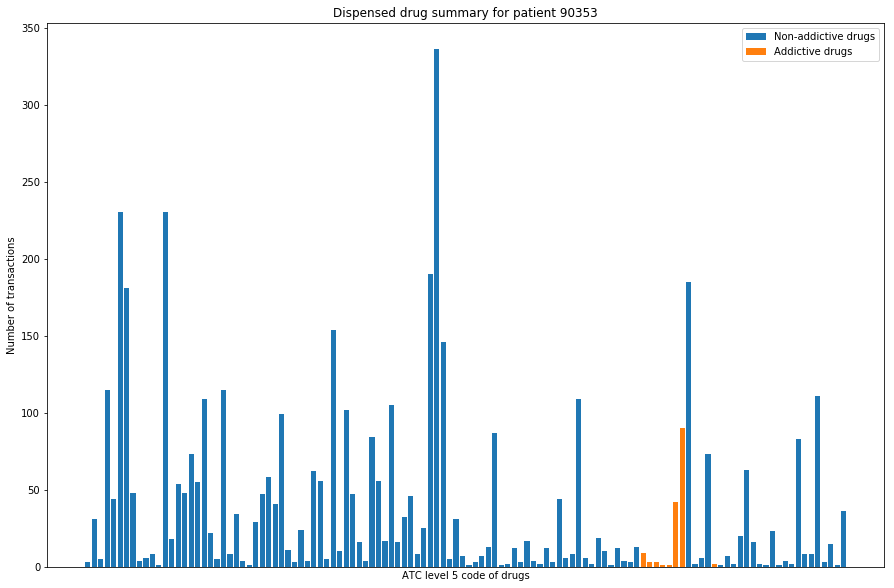

In [45]:
fig, ax = plt.subplots()
abuse_drug_mask = np.in1d(unique_L5C, unique_abuse_L5C)
plt.bar(np.arange(unique_L5C.shape[0]), count_L5C, label='Non-addictive drugs')
plt.bar(np.arange(unique_L5C.shape[0])[abuse_drug_mask], count_L5C[abuse_drug_mask], label='Addictive drugs')
plt.ylabel('Number of transactions')
plt.xlabel('ATC level 5 code of drugs')
plt.title('Dispensed drug summary for patient 90353')
plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off') # labels along the bottom edge are off
plt.legend()
plt.savefig('patient90353_addictive_drugs.png', bbox_inches='tight')

In [43]:
df = df[['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week',
             'PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt']]

In [46]:
def read_patients(i):
    df = pd.read_csv(root_path + 'Final/patient_%d.csv' % i, 
                     parse_dates = ['Prescription_Week', 'Dispense_Week'],
                     usecols=['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week'])
    df.columns = ['PID', 'SID', 'PresID', 'DID', 'PresWeek', 'DispWeek']
    return df

def convert_to_matrix(df):
    assert(set(df.dtypes.values) == {np.dtype('int64'), np.dtype('<M8[ns]')}) # data dtype is either date or int64

    matrix = np.zeros(df.shape, dtype=np.int32)

    year2000 = np.datetime64('2000-01-01')
    for i, (col_dtype, col_name) in enumerate(zip(df.dtypes.values, df.columns)):
        if col_dtype == np.dtype('int64'):
            matrix[:, i] = df[col_name].values
        else:
            matrix[:, i] = (df[col_name].values - year2000).astype('timedelta64[D]')
    return matrix, df.index.values

def read_data(file_range):
    transactions = []
    for i in file_range:
        print(i, end=' ')
        transactions.append(convert_to_matrix(read_patients(i))[0])
    print('finish loading')

    transactions = np.vstack(transactions)

    transactions[:, 0] -= transactions[:, 0].min() # now patient ID starts at 0
    return transactions

In [47]:
%%time
transactions = read_data(range(1, 51)) # 1~50

num_patients = transactions[-1, 0] + 1
print('patients in the training set:', num_patients)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 finish loading
patients in the training set: 558352
Wall time: 1min 30s


In [48]:
patients = np.asanyarray(np.split(transactions, np.bincount(transactions[:, 0]).cumsum()[:-1]))

In [92]:
presID_count = np.zeros(num_patients, dtype=np.int32)
for i, patient in enumerate(patients):
    presID_count[i] = np.unique(patient[:, 2]).shape[0]

In [94]:
presID_count.mean(), presID_count[presID_count!=0].mean()

(4.6102225836031749, 4.6343758664270975)

In [ ]:
for x in zip(*np.unique(presID_count, return_counts=True)):
    print('%d \t%d'%x)

In [101]:
drug_with_ill = drug_lookup.index.values[~drug_lookup.ChronicIllness.isnull()]

In [103]:
transactions_with_ill = transactions[np.in1d(transactions[:, 3], drug_with_ill)]

In [49]:
unique_presID, count_presID = np.unique(patients[90352][:, 2], return_counts=True)

In [50]:
unique_presID, count_presID

(array([    0,   652,  1058,  2075,  3088,  4243,  6067,  6145,  7275,
         8251,  8298,  8461,  8557, 10246, 10531, 10901, 11140, 12735,
        12974, 13197, 13374, 14190, 14232, 14764, 15621, 17013, 17122,
        18275, 18788, 19256, 20207, 20418, 20765, 21042, 21052, 21092,
        22877, 23316, 23921, 25741, 26444, 27843, 28381, 28403, 28803,
        29433, 30110, 31346, 31559, 31799, 32096, 32198, 33157, 33202,
        34222, 36592, 37729, 38361, 40813, 41349, 41443, 42066, 42515,
        43390, 44098, 47291, 47350, 48907, 49392, 50021, 50709, 50883,
        51253, 53672, 54303, 54876, 56085, 56890, 57564, 59268, 59782,
        60460, 60680, 62073, 62185, 63049]),
 array([305,  16,  16,   2,   3,  10, 138,  44,  12,  79,  21, 311,  79,
         16,   4,   3,  12,   8,  20,  51,   4,   3,  31,  20,  95,   8,
         20,  71,  78,  54,   2,  25, 188,   2,  32,   1,   1,   4,  13,
          3,  23,   6,   1,   4,   6, 326,   5,   8, 343,  20,   4,   4,
         37,   2,  18,  

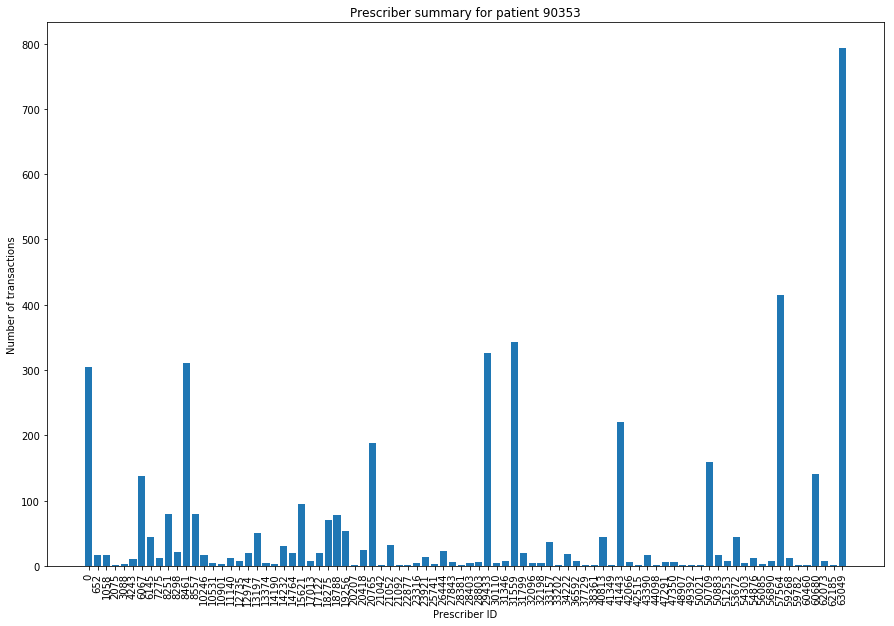

In [91]:
plt.bar(np.arange(unique_presID.shape[0]), count_presID)
plt.title('Prescriber summary for patient 90353')
plt.ylabel('Number of transactions')
plt.xlabel('Prescriber ID')
plt.xticks(np.arange(unique_presID.shape[0]), unique_presID, rotation='vertical')
plt.savefig('patient90353_prescribers.png', bbox_inches='tight')
plt.show()

In [51]:
unique_presID[np.argsort(count_presID)][-10:]

array([60680, 50709, 20765, 41443,     0,  8461, 29433, 31559, 57564, 63049])

In [59]:
presID_list = [8461, 29433, 31559, 57564, 63049]
drug_set = np.unique(transactions[np.in1d(transactions[:, 2], presID_list)][:, 3])

In [62]:
L2C_set = drug_lookup.loc[drug_set, 'L2C'].unique()

In [63]:
prescriber_summary = pd.DataFrame(index=L2C_set)

In [65]:
def prescriber_info(presID, transactions):
    df = pd.DataFrame(transactions, columns=['PID', 'SID', 'PresID', 'DID', 'PresWeek', 'DispWeek'])
    counter = Counter(df.join(drug_lookup, on='DID').L2C)
    for code, cnt in counter.items():
        prescriber_summary.loc[code, presID] = cnt
    return pd.DataFrame.from_records(list(counter.items()), 
                                     columns=['ATC', 'Cnt']).join(ATC_lookup, on='ATC').sort_values('Cnt', ascending=False)

for presID in presID_list:
    prescriber_info(presID, transactions[transactions[:, 2]==presID])

In [78]:
for presID, trans in df_with_ATC[['Prescriber_ID', 'L2C']].groupby('Prescriber_ID'):
    if presID in presID_list:
        counter = Counter(trans.L2C)
        for code, cnt in counter.items():
            prescriber_summary.loc[code, '%d->90353'%presID] = cnt

In [80]:
prescriber_summary.join(ATC_lookup).to_csv('90353_and_top5_presciber.csv', 
                                           index_label='ATC_L2_code', encoding='utf-16', sep='\t')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D80A921D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021D81366860>], dtype=object)

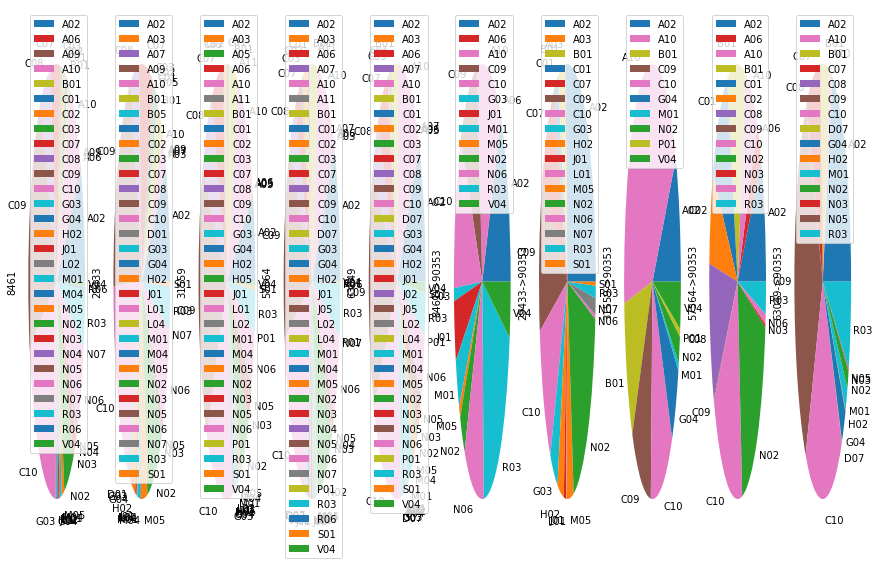

In [85]:
prescriber_summary.sort_index().plot(kind='pie', subplots=True)